# <font color="#0077b6"> Desafio Individual - Data Visualization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

# **Desafio Prático 1: Visualizando Dados Diferentes**

**Descrição:** Neste desafio, suas alunas irão visualizar dados de diferentes formas utilizando
Matplotlib, Seaborn e Plotly. Elas deverão criar gráficos que mostrem a distribuição dos
dados, correlações entre variáveis e tendências.

**Tarefas:**

1. Carregar os dados de um arquivo CSV fornecido (saude.csv).


In [ ]:
df_saude = pd.read_csv('saude.csv')

df_saude.head()

,id,age,height,weight,gender
0,1,23,170,70,M
1,2,34,160,65,F
2,3,45,175,80,M
3,4,25,165,55,F
4,5,36,180,90,M


2. Criar um histograma da variável 'age' usando Matplotlib.


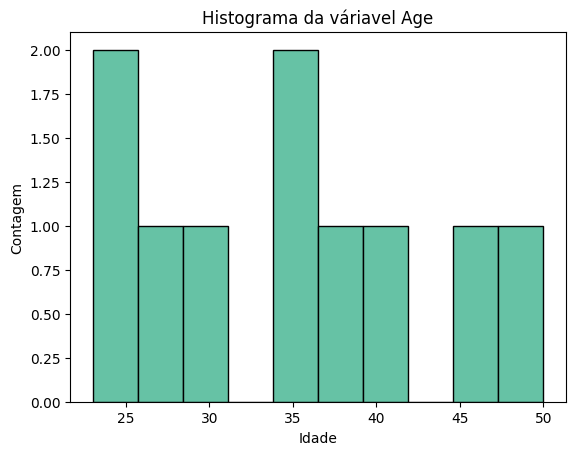

In [ ]:
idade = df_saude['age']

sns.set_palette('Set2')
plt.hist(idade, bins=10, edgecolor='black')
plt.title('Histograma da váriavel Age')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

3. Criar um gráfico de dispersão mostrando a relação entre 'height' e 'weight' usando
Seaborn.


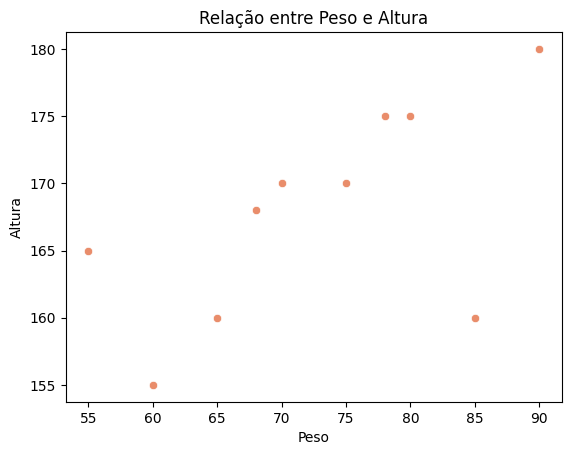

In [ ]:
sns.set_palette("flare")
sns.scatterplot(data = df_saude, x = 'weight', y = 'height')
plt.title('Relação entre Peso e Altura')
plt.xlabel('Peso')
plt.ylabel('Altura')
plt.show()

4. Criar um gráfico interativo de barras mostrando a contagem de indivíduos por
'gender' usando Plotly.


In [ ]:
gender_counts = df_saude['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']

fig = px.bar(gender_counts, x='gender', y='count', color = 'gender', title='Contagem de Indivíduos por Gênero', labels={'gender': 'Gênero', 'count': 'Contagem'})
fig.show()

# **Desafio Prático 2: Séries Temporais**

**Descrição:** Neste desafio, suas alunas irão analisar uma série temporal de dados de
vendas. Elas deverão criar gráficos que mostrem as vendas ao longo do tempo, identificar
tendências e sazonalidades.

**Tarefas:**


1. Carregar os dados de um arquivo CSV fornecido (vendas.csv)

In [ ]:
df_vendas = pd.read_csv('vendas.csv')

df_vendas.head()

,date,sales
0,2023-01-01,100
1,2023-01-02,150
2,2023-01-03,200
3,2023-01-04,130
4,2023-01-05,180


2. Criar um gráfico de linhas das vendas ao longo do tempo usando Matplotlib.


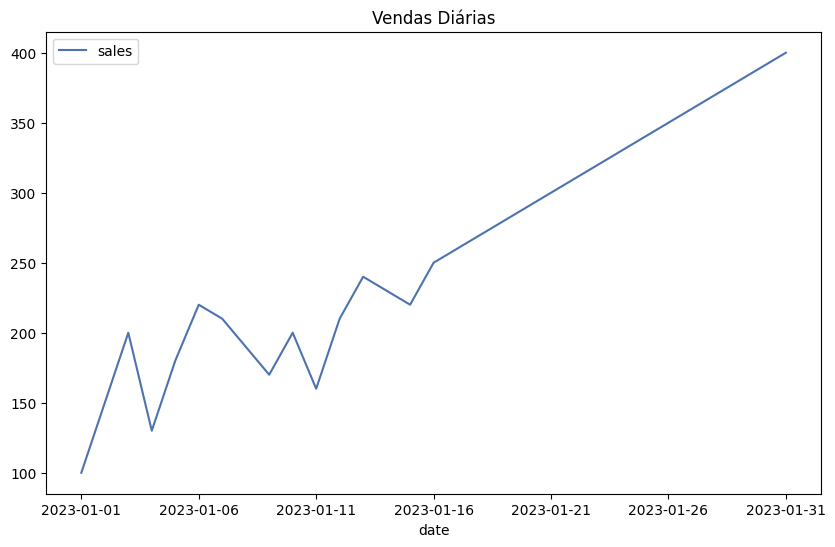

In [ ]:
sns.set_palette('deep')

df_vendas.set_index('date', inplace=True)

df_vendas.plot(figsize=(10, 6))
plt.title('Vendas Diárias')
plt.show()

3. Criar um gráfico de decomposição sazonal usando Seaborn.


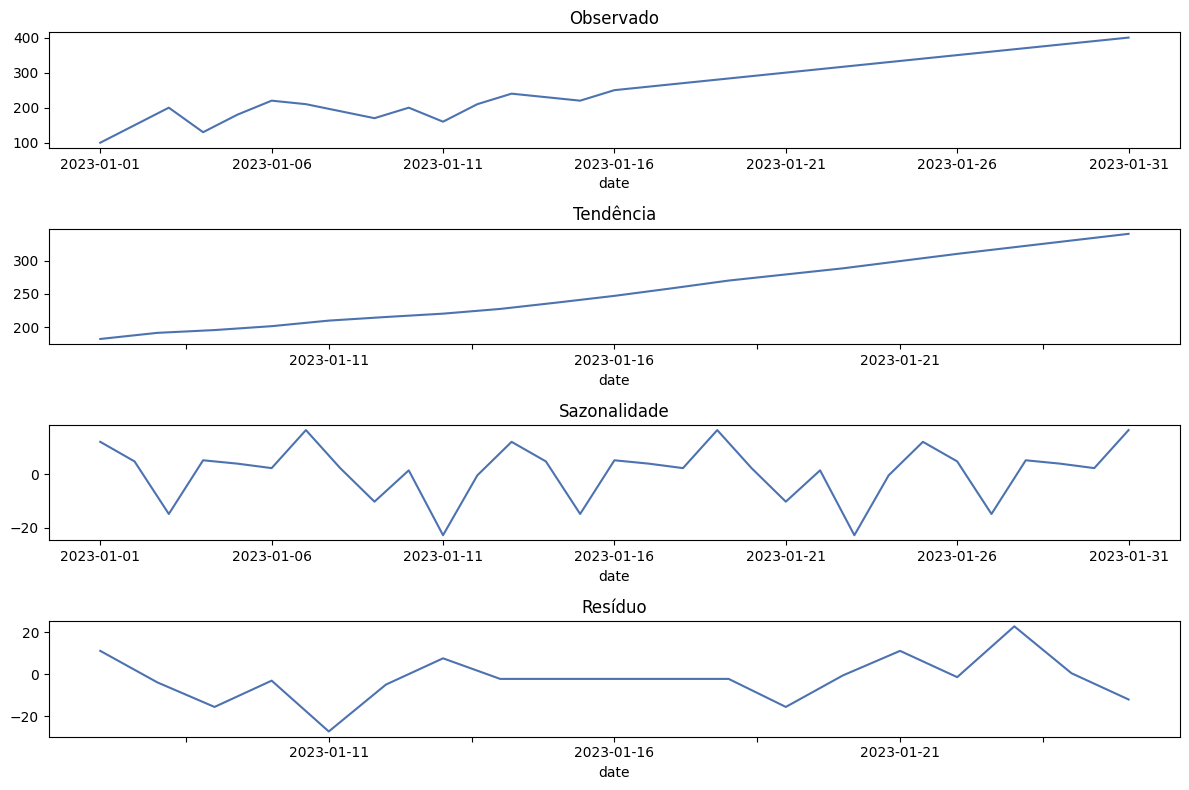

In [ ]:
decomposition = seasonal_decompose(df_vendas['sales'], model='additive', period=12)

# Plotar os componentes
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
decomposition.observed.plot(ax=ax1)
ax1.set_title('Observado')
decomposition.trend.plot(ax=ax2)
ax2.set_title('Tendência')
decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Sazonalidade')
decomposition.resid.plot(ax=ax4)
ax4.set_title('Resíduo')
plt.tight_layout()
plt.show()

4. Criar um gráfico interativo que permita a exploração dos dados de vendas ao longo
do tempo usando Plotly

In [ ]:
fig = px.line(df_vendas, x='date', y='sales', title='Exploração de Vendas ao Longo do Tempo',
              labels={'date': 'Data', 'sales': 'Vendas'})

# Adicionando hover para detalhes adicionais
fig.update_traces(mode='lines+markers')